1. O problema do circuito com diodo apresentado no capítulo 4 pode ser
equacionado por um sistema n„o linear da seguinte forma:

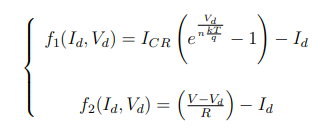

onde Id é a corrente no diodo e Vd é a tensão no diodo. Admitindo um
diodo 1N4001 com IC R = 31,9824 nA, n = 2, k = 1,3806 x 10−23
J/K, T = 300K (26,85 ◦C) e q = 1,6022 x 1019 C, encontre Id e Vd.
Resposta: Partindo de Vd = 1 V e Id = 2 A, com 5 iterações obtém-se o
critério de parada de quatro casas decimais. Vd = 0,9355 V e
Id = 2,3065 A.
Observão: esta questão apresenta problema de condicionamento. Isso
é devido as diferenças nos valores entre as grandezas, particularmente
10−9 e 10−23. Rever capítulo 5.


In [2]:
# Sistemas Não Lineares
# Metodo: Newton Raphson
# Questão: 1
# Fellipe Carvalho


from math import pi, exp
from numpy import array, divide, linalg
Icr = 31.9824*10**(-9)
n = 2
k = 1.3806*10**(-23)
T = 300
q = 1.6022*10**(19)
V = 24
R = 10

x = array([[1],[2]])
iter = 0
maxit = 50
es = 0.001
while True:
  f1 = (Icr((exp**(x(2)/(n*k*T/q)-1))))-x(1)
  f2 = ((V-x(2))/R)-x(1)
  F = array([f1,f2])       # Matriz de funções
  
  J = array([[-1, Icr*(exp**(x(2)/(n*k*T/q))-1)/(n*k*T/q)],
             [-1,                                -1/R]])  # Matriz Jacobiana
  dx = linalg.lstsq(J,F,rcond=None)[0]
  x = x - dx
  iter += 1
  ea = max(abs(divide(dx,x)))
  if iter >= maxit or ea <= es:
    break
print(f'Com {iter} iterações: \n x = \n {x}')




TypeError: ignored

2. O problema de fluxo de potência num sistema elétrico de três barras é
apresentado na forma de diagrama unifilar e seu circuito equivalente. As
admitâncias y possuem valor de 1 + j1 pu.
Admitindo que as correntes nas barras sejam iguais a 1 pu, determine as
tensões.

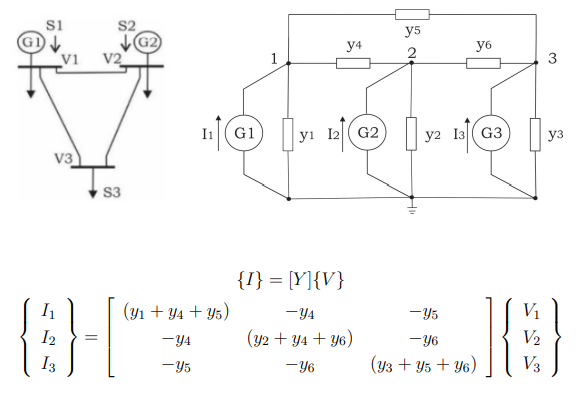


Resposta: pelo método de Gauss-Siedel, obtém-se {V } = 0,5000 +
j0,5000 pu na 13◦ iteração com critério de parada de quatro casas
decimais.




In [3]:
# Sistemas Não Lineares
# Metodo: Newton Raphson
# Questão: 2
# Fellipe Carvalho


from math import pi, exp
from numpy import array, divide, linalg
lf = 0.4      # comprimento médio no ferro (m)
le = 0.0008   # comprimento médio no entreferro (m)
N = 200       # Número de espiras
I = 10        # Corrente elétrica(A)
mi = 4 * pi * 10**(-7)
x = array([[1250000], # aproximações iniciais
           [70]])
iter = 0
maxit = 50
es = 0.001
while True:
  f1 = (2*x[0]*le + x[1]*lf - N*I)
  f2 = (-mi*x[0] + 1.8*(1-exp(-(x[1])/40)))
  F = array([f1,f2])                               # Matriz de funções
  
  J = array([[2*le,                        lf],   
              [-mi, 1.8*(1/40)*exp(-(x[1])/40)]])  # Matriz Jacobiana
  dx = linalg.lstsq(J,F,rcond=None)[0]
  x = x - dx
  iter += 1
  ea = max(abs(divide(dx,x)))
  if iter >= maxit or ea <= es:
    break
print(f'Com {iter} iterações: \n x = \n {x}')

Com 3 iterações: 
 x = 
 [[1.23041084e+06]
 [7.83566412e+01]]
